In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [427]:
def z_score(df: pd.DataFrame, col: str):
    return (df[col] - df[col].mean()) / df[col].std()

In [428]:
df = pd.read_csv('Online_Retail.csv', encoding='latin1')

In [429]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [430]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [431]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [432]:
df['CustomerID'].nunique() # 4372
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
_col = df['Country'], df['CustomerID']
df.drop(columns=['StockCode', 'InvoiceDate', 'CustomerID', 'Country'], axis=1, inplace=True) # StockCode and InvoiceDate are not useful
df['Revenue'] = df['Quantity'] * df['UnitPrice'] # Total revenue for a purchase
df.insert(loc=1, column='Country', value=_col[0]) # Reorders Country
df.insert(loc=0, column='CustomerID', value=_col[1]) # Reorders CustomerID
df['Description'].fillna(df['Description'].mode()[0], inplace=True) # Imputes some missing descriptions

In [433]:
display(df.head())
display(df.describe(include='all'))
print(df.isnull().sum())

,CustomerID,InvoiceNo,Country,Description,Quantity,UnitPrice,Revenue
0,17850,536365,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


,CustomerID,InvoiceNo,Country,Description,Quantity,UnitPrice,Revenue
count,406829.000000,406829,406829,406829,406829.000000,406829.000000,406829.000000
unique,NaN,22190,37,3896,NaN,NaN,NaN
top,NaN,576339,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN
freq,NaN,542,361878,2070,NaN,NaN,NaN
mean,15287.690570,NaN,NaN,NaN,12.061303,3.460471,20.401854
std,1713.600303,NaN,NaN,NaN,248.693370,69.315162,427.591718
min,12346.000000,NaN,NaN,NaN,-80995.000000,0.000000,-168469.600000
25%,13953.000000,NaN,NaN,NaN,2.000000,1.250000,4.200000
50%,15152.000000,NaN,NaN,NaN,5.000000,1.950000,11.100000
75%,16791.000000,NaN,NaN,NaN,12.000000,3.750000,19.500000


CustomerID     0
InvoiceNo      0
Country        0
Description    0
Quantity       0
UnitPrice      0
Revenue        0
dtype: int64


In [434]:
customer_df = df.groupby('CustomerID').aggregate({'InvoiceNo': 'nunique', 'Quantity': 'sum', 'Revenue': 'sum'}).rename(columns={'InvoiceNo': 'Purchases'}).reset_index()

In [435]:
display(customer_df.head())
display(customer_df.describe())

,CustomerID,Purchases,Quantity,Revenue
0,12346,2,0,0.00
1,12347,7,2458,4310.00
2,12348,4,2341,1797.24
3,12349,1,631,1757.55
4,12350,1,197,334.40


,CustomerID,Purchases,Quantity,Revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,5.075480,1122.344007,1898.459701
std,1722.390705,9.338754,4672.790720,8219.345141
min,12346.000000,1.000000,-303.000000,-4287.630000
25%,13812.750000,1.000000,153.000000,293.362500
50%,15300.500000,3.000000,365.000000,648.075000
75%,16778.250000,5.000000,962.250000,1611.725000
max,18287.000000,248.000000,196719.000000,279489.020000


In [436]:
customer_df.value_counts() # 541909 rows -> 4372

CustomerID  Purchases  Quantity  Revenue
12346       2          0         0.00       1
16282       1          114       168.30     1
16295       4          841       1328.55    1
16293       12         978       2236.74    1
16292       2          188       280.90     1
                                           ..
14321       5          2406      1530.75    1
14323       4          340       574.26     1
14326       2          99        166.85     1
14327       1          139       311.65     1
18287       3          1586      1837.28    1
Name: count, Length: 4372, dtype: int64

In [437]:
# Calculates Z-Scores and appends them as new columns
customer_df['Quantity Z-Score'] = z_score(customer_df, 'Quantity')
customer_df['Revenue Z-Score'] = z_score(customer_df, 'Revenue')

# Number of standard deviations to consider
threshold = 3

# Removes outliers and negative numbers
customer_df = customer_df[
    np.abs((customer_df['Quantity Z-Score']) <= threshold) &
    np.abs((customer_df['Revenue Z-Score']) <= threshold) &
    (customer_df['Quantity'] >= 0) &
    (customer_df['Revenue'] >= 0)
].copy()
customer_df.drop(columns=['Quantity Z-Score', 'Revenue Z-Score'], axis=1, inplace=True) # Removes new Z-Score columns

In [438]:
customer_df.value_counts() # 4372 rows -> 4293

CustomerID  Purchases  Quantity  Revenue
12346       2          0         0.00       1
16295       4          841       1328.55    1
16271       6          1037      1423.29    1
16272       1          224       411.70     1
16274       1          155       357.95     1
                                           ..
14326       2          99        166.85     1
14327       1          139       311.65     1
14329       14         3075      4928.74    1
14331       2          252       462.66     1
18287       3          1586      1837.28    1
Name: count, Length: 4293, dtype: int64

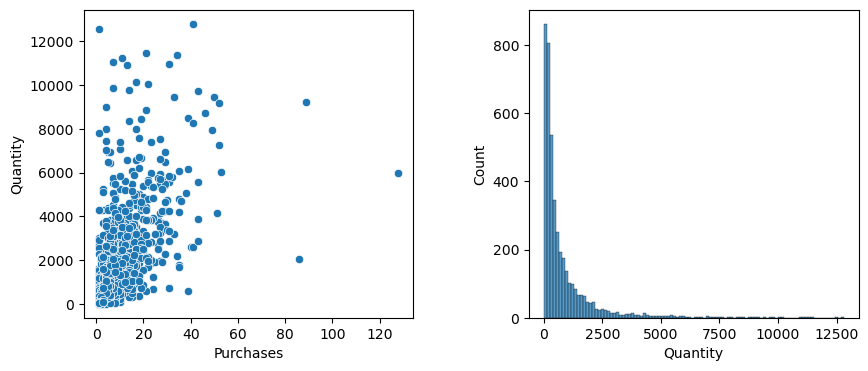

In [439]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(data=customer_df, x='Purchases', y='Quantity', ax=ax1)
sns.histplot(data=customer_df, x='Quantity', bins=100, ax=ax2)
fig.subplots_adjust(wspace=0.35)
plt.show()

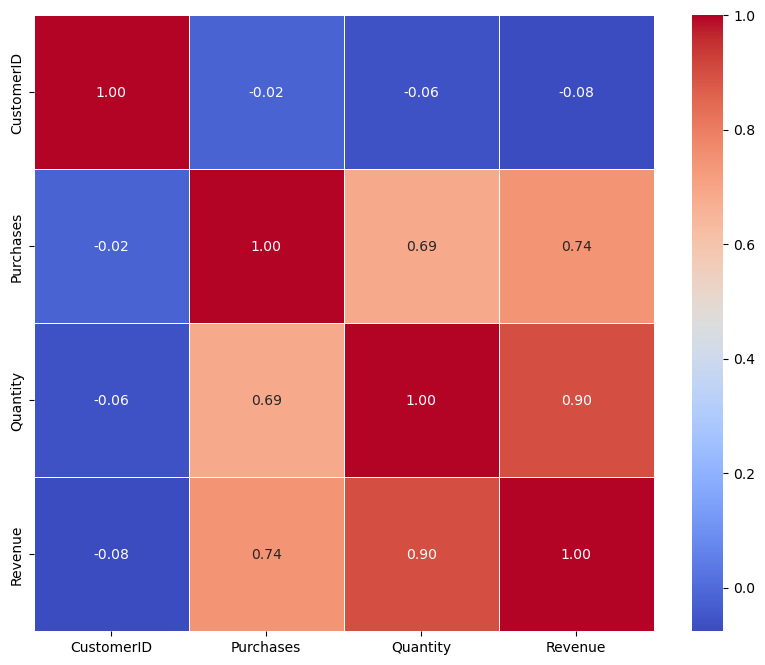

In [440]:
plt.figure(figsize=(10, 8))
sns.heatmap(customer_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

In [441]:
scaler = StandardScaler()
features = ['Purchases', 'Quantity', 'Revenue']
customer_df[features] = scaler.fit_transform(customer_df[features])
customer_df.head()

,CustomerID,Purchases,Quantity,Revenue
0,12346,-0.426993,-0.647370,-0.645656
1,12347,0.380318,1.274822,1.342349
2,12348,-0.104069,1.183326,0.183328
3,12349,-0.588455,-0.153919,0.165021
4,12350,-0.588455,-0.493313,-0.491413


In [445]:
# Assuming K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_df[features])

# Assign the clusters to each data point
customer_df['Cluster'] = kmeans.labels_
customer_df.head()

,CustomerID,Purchases,Quantity,Revenue,Cluster
0,12346,-0.426993,-0.647370,-0.645656,1
1,12347,0.380318,1.274822,1.342349,0
2,12348,-0.104069,1.183326,0.183328,0
3,12349,-0.588455,-0.153919,0.165021,1
4,12350,-0.588455,-0.493313,-0.491413,1


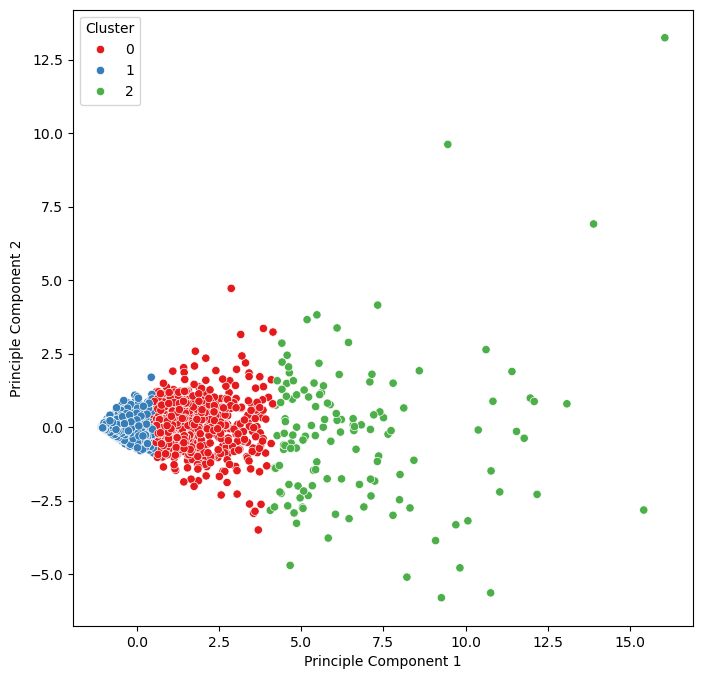

In [456]:
pca = PCA(n_components=2)

customer_df['Principle Component 1'], customer_df['Principle Component 2'] = zip(*pca.fit_transform(customer_df[features]))

plt.figure(figsize=(8, 8))
sns.scatterplot(data=customer_df, x='Principle Component 1', y='Principle Component 2', hue='Cluster', palette='Set1')
plt.show()